In [1]:
%matplotlib inline
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack 
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord 
from astropy.wcs import WCS
import astropy.wcs as pywcs
import scipy.ndimage as sci_nd


In [2]:

#amended code

def select_object_segmap(segmap,index):
    Regions = np.zeros_like(segmap)
    if index not in segmap:
        raise ValueError('index not in segmentation map')
    #print(np.where(segmap==index))
    Regions[segmap==index]=index
    return Regions

# #brunos code----i amended below
# def create_mask(filter,star_table):
#     masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
#     segmap_file = fits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(filter))#[0].data
#     segmap = segmap_file[0].data    
    
    
#     regions = np.zeros_like(segmap)
#     for detection in star_table:
#         index = detection['NUMBER'.format(filter)]
#         if isinstance(index,np.int64):
#             regions += select_object_segmap(segmap,index)
#     return segmap,regions 

#amended code
def create_mask(filter):
    masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
    segmap_file = fits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(filter))#[0].data
    segmap = segmap_file[0].data    
    star_table = ascii.read('/data1/rowland/starnumbers/{}_starsNUMBERSforsegmap'.format(filter))
    regions = np.zeros_like(segmap)
    for detection in star_table:
        #print(num)
        index = detection['NUMBER']
        if isinstance(index,np.int64):
            regions += select_object_segmap(segmap,index)
    return segmap,regions 

In [3]:
#zoom function
def elgordo_zoom(ra,dec,value=None):
    filters = ["F160W","F140W","F125W","F105W","F850LP","F814W","F775W","F625W","F606W","F435W"]
    xl_list=[]
    xu_list=[]
    yl_list=[]
    yu_list=[]
    axs=[]
    myfiles = []
    for count, filter in enumerate(filters):
        axs.append('ax'+ str(count))
        files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
        data0 = files[0].data
        myfiles.append(files)     
    for f in myfiles:
        header = f[0].header
        wcs=pywcs.WCS(header)
        xy = np.array(wcs.wcs_world2pix(ra,dec,1))
        xy.astype(int)
        if value is None:
            value = 100
        xlower = int(round(xy[0])) -value
        xupper = int(round(xy[0])) +value
        ylower = int(round(xy[1])) -value
        yupper = int(round(xy[1])) +value
        xl_list.append(xlower)
        xu_list.append(xupper)
        yl_list.append(ylower)
        yu_list.append(yupper)  
    #fig = plt.figure(figsize=(100,100))
    plt.rcParams.update({'font.size': 20})
    fig, axs = plt.subplots(1,10, figsize=(50,50))
    for idx,file in enumerate(myfiles):
        axs[idx].imshow(myfiles[idx][0].data, vmin=0,vmax=1)
        axs[idx].set_xlim(xl_list[idx],xu_list[idx])
        axs[idx].set_ylim(xl_list[idx],xu_list[idx])
        axs[idx].set_title(file.filename()[23::])


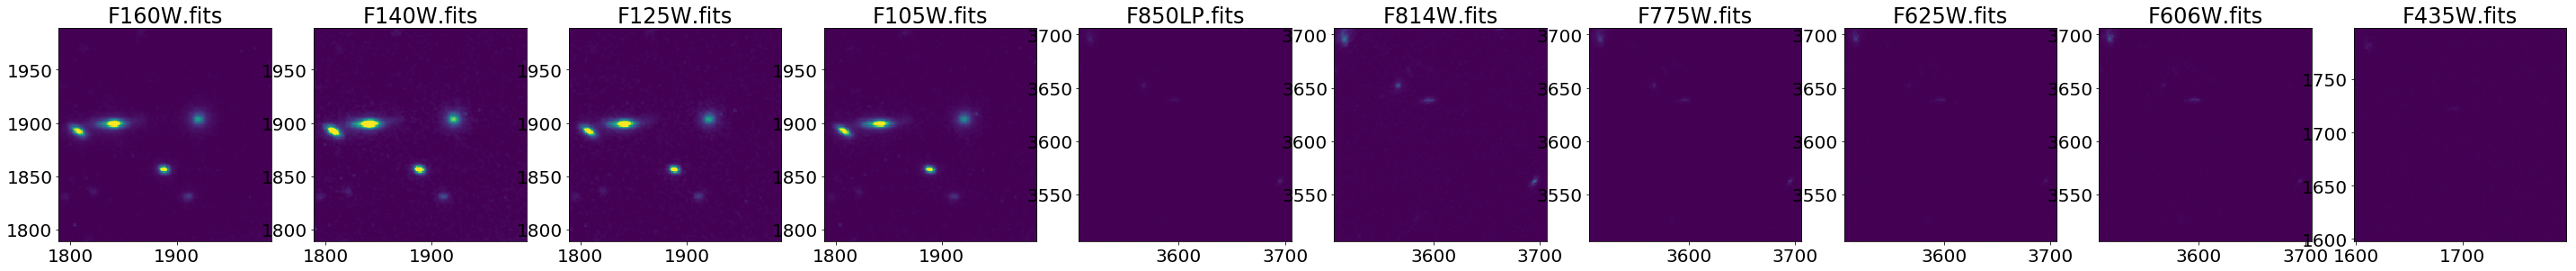

In [17]:
elgordo_zoom(15.7442896, -49.2703448)#(15.7142851, -49.2491452)

In [3]:
masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
#masterdata = ascii.read('/data1/rowland/mastertable')
masterdata_wkabooms = ascii.read('/data1/rowland/mastertable_wkabooms')
#masterdata['NUMBER_F850']

In [10]:
##################################################
testfilter = 'F105W' 
###########################################

# old star selection

In [8]:
#seeing how many stars per filter SExtractor classified

# filters = ["F160W","F140W","F125W","F105W","F850LP","F814W","F775W","F625W","F606W","F435W"]
# starthresh = 0.98
# for filter in filters:
#     SE_table = ascii.read('/data1/rowland/testPSF_{}.cat'.format(filter))
#     print('whole {} dataset'.format(filter),np.shape(SE_table))
#     stars = SE_table[np.where(SE_table['CLASS_STAR']>starthresh)]
#     print('stars',np.shape(stars))

In [9]:
#need to make a stars master table per filter, using SExtractor classifications
#so that can run create_mask fcn

# nums ={}
# starclass = {}
# xpix={}
# ypix={}
# fluxrad={}
# for filter in filters:
#     SE_table = ascii.read('/data1/rowland/testPSF_{}.cat'.format(filter))
#     #print('whole {} dataset'.format(filter),np.shape(SE_table))
#     stars = SE_table[np.where(SE_table['CLASS_STAR']>starthresh)]
#     nums[filter] = np.zeros_like(stars['NUMBER'])
#     nums[filter] += stars['NUMBER']
#     starclass[filter] = np.zeros_like(stars['CLASS_STAR'])
#     starclass[filter] += stars['CLASS_STAR']
#     xpix[filter] = np.zeros_like(stars['X_IMAGE'])
#     xpix[filter] += stars['X_IMAGE']
#     ypix[filter] = np.zeros_like(stars['Y_IMAGE'])
#     ypix[filter] += stars['Y_IMAGE']
#     fluxrad[filter] = np.zeros_like(stars['FLUX_RADIUS'])
#     fluxrad[filter] += stars['FLUX_RADIUS']
#     #['NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE','FLUX_RADIUS']
#     #print('stars',np.shape(stars))
# t_F105W = Table([nums['F105W'],starclass['F105W'],xpix['F105W'],ypix['F105W'],fluxrad['F105W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F125W = Table([nums['F125W'],starclass['F125W'],xpix['F125W'],ypix['F125W'],fluxrad['F125W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F140W = Table([nums['F140W'],starclass['F140W'],xpix['F140W'],ypix['F140W'],fluxrad['F140W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F160W = Table([nums['F160W'],starclass['F160W'],xpix['F160W'],ypix['F160W'],fluxrad['F160W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F435W = Table([nums['F435W'],starclass['F435W'],xpix['F435W'],ypix['F435W'],fluxrad['F435W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F606W = Table([nums['F606W'],starclass['F606W'],xpix['F606W'],ypix['F606W'],fluxrad['F606W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F625W = Table([nums['F625W'],starclass['F625W'],xpix['F625W'],ypix['F625W'],fluxrad['F625W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F775W = Table([nums['F775W'],starclass['F775W'],xpix['F775W'],ypix['F775W'],fluxrad['F775W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F814W = Table([nums['F814W'],starclass['F814W'],xpix['F814W'],ypix['F814W'],fluxrad['F814W']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))
# t_F850LP = Table([nums['F850LP'],starclass['F850LP'],xpix['F850LP'],ypix['F850LP'],fluxrad['F850LP']],names=('NUMBER','CLASS_STAR','X_IMAGE','Y_IMAGE',' FLUX_RADIUS'))

# t_F105W

# new star selection

RED line is B1, BLUE line is B2
Above red line are galaxies, between red & blue are stars


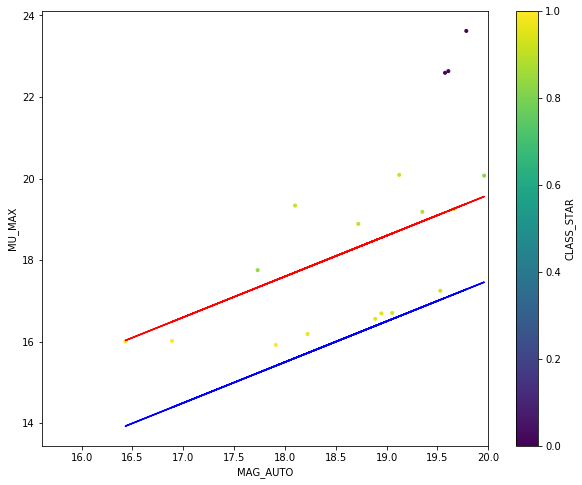

In [3]:
#see what values to use PER FILTER

#B1values ={"F140W":.5,"F125W":.5,"F105W":.5,"F850LP":.15,"F814W":.4,"F775W":.185,"F625W":0.3,"F606W":-1,"F435W":0,"F160W":.5} #note F435 no stars
#B2values ={"F140W":2,"F125W":2,"F105W":2,"F850LP":2,"F814W":2.5,"F775W":2.2,"F625W":2.2,"F606W":2.9,"F435W":0,"F160W":2}
#note had to manually remove 1 detection rom F606,F625,F775 with these values & do ellipticity cut belowfor others
#############################
filters=['F814W']
B1 = .4 
B2 = 2.5
##############################
for filtername in filters:
    detected_objs_file_table = ascii.read('/data1/rowland/testPSF_{}.cat'.format(filtername))
    short_detections_intermediate = np.where(detected_objs_file_table['MAG_AUTO']<20) 
    image_file = fits.open('/data1/rowland/elgordo_{}.fits'.format(filtername))

    short_detections_stillstarstho = detected_objs_file_table[short_detections_intermediate]
    print('RED line is B1, BLUE line is B2')
    print('Above red line are galaxies, between red & blue are stars')

    fig,ax = plt.subplots(figsize=(10,8))
    S = ax.scatter(short_detections_stillstarstho["MAG_AUTO"],short_detections_stillstarstho["MU_MAX"], \
                   c =short_detections_stillstarstho["CLASS_STAR"], marker=".")
    P2 = ax.plot(short_detections_stillstarstho["MAG_AUTO"],short_detections_stillstarstho["MAG_AUTO"]-B1,color='r')
    P1 = ax.plot(short_detections_stillstarstho["MAG_AUTO"],short_detections_stillstarstho["MAG_AUTO"]-B2,color='b')
    ax.set_xlim(0.95*min(short_detections_stillstarstho["MAG_AUTO"]),20)
    ax.set_xlabel("MAG_AUTO")
    ax.set_ylabel("MU_MAX")
    CLB = plt.colorbar(S,ax=ax)
    CLB.set_label("CLASS_STAR")
    plt.show()        

In [4]:
#enforceing star selections PER FILTER

SE_TESTshort1=detected_objs_file_table[np.where(detected_objs_file_table["MU_MAX"] < (detected_objs_file_table["MAG_AUTO"]-B1))]
SE_TESTshort2=SE_TESTshort1[np.where(SE_TESTshort1["MU_MAX"] > (SE_TESTshort1["MAG_AUTO"]-B2))]
SE_TESTshort3 = SE_TESTshort2[np.where(SE_TESTshort2['MAG_AUTO']<20)]
starselection = SE_TESTshort3[np.where(SE_TESTshort3['ELLIPTICITY']<0.30)]#for all before 775  <=1.0)] #

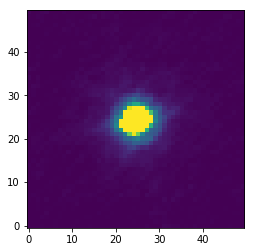

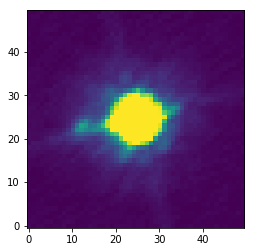

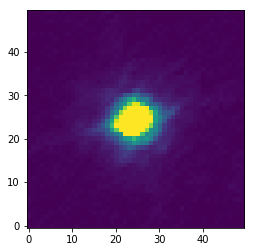

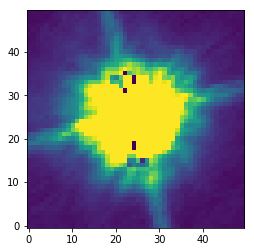

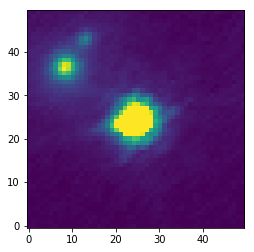

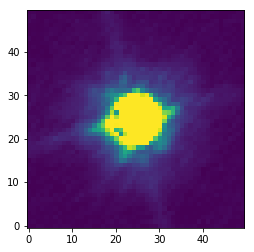

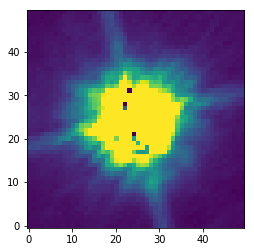

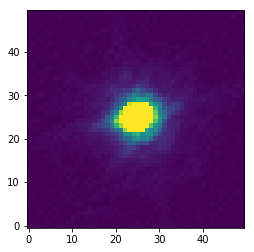

In [5]:
#verfiy selections are stars PER FILTER

image_data = image_file[0].data #PARAMETER
for image in starselection: #CHANGE SELECTION_OF... TO SEE STARS V GALAXIES
    x = image['X_IMAGE'].astype(np.int)
    y = image['Y_IMAGE'].astype(np.int)
    width = 25
    fig = plt.figure()
    plt.imshow(image_data[y-width:y+width,x-width: x+width ], vmin=0,vmax=1)

In [145]:
# F606_stars = starselection.remove_row(11)
# F606_stars
# starselection.remove_row(11)
# starselection

In [6]:
# two = short_detections_stillstarstho[np.where(short_detections_stillstarstho['NUMBER']==2060)] #for F775
# F775_stars = vstack([starselection,two])

# three = short_detections_stillstarstho[np.where(short_detections_stillstarstho['NUMBER']==331)] #for F625
# F625_stars = vstack([starselection,three])

four = short_detections_stillstarstho[np.where(short_detections_stillstarstho['NUMBER']==281)] #for F814
F814_stars = vstack([starselection,four])
F814_stars
#F606_stars = starselection.remove_row(11)


NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
107,19.5287,0.0395,3.5,345,4555,2798,4554.5649,2798.2493,15.7200537,-49.2802933,2.05,27.23,17.2495,0.101,0.923,1.443
379,17.9097,0.0188,3.5,1031,4757,3635,4757.375,3635.5608,15.714877,-49.2663375,2.88,17.89,15.9221,0.155,0.999,1.578
459,18.9494,0.0303,3.5,532,5086,3744,5086.1992,3744.1692,15.7064794,-49.2645259,2.3,22.58,16.6936,0.124,0.946,1.468
595,16.4299,0.0095,3.5,5747,4274,4389,4273.3853,4388.9653,15.7272397,-49.2537819,7.538,89.29,16.0015,0.142,1.0,3.294
729,18.8885,0.0294,3.5,506,4471,4438,4471.29,4438.103,15.7221864,-49.2529626,2.314,45.33,16.5616,0.107,0.96,1.451
734,18.2228,0.0217,3.5,1315,4323,4588,4322.6553,4587.6377,15.725982,-49.2504706,3.669,-76.99,16.1888,0.038,0.971,1.612
1092,16.8891,0.0117,3.5,3874,5430,5685,5429.6885,5684.6396,15.6977288,-49.2321825,6.313,-83.48,16.0176,0.094,1.0,2.669
1149,19.0547,0.0318,3.5,508,3915,5549,3914.6799,5548.9771,15.7363972,-49.2344484,2.316,23.66,16.7061,0.137,0.938,1.443


In [8]:
# plt.figure(figsize=(10,10))
# plt.imshow(F814_stars,vmin=0,vmax=1)

In [9]:
filtername

'F814W'

In [10]:
#ascii.write(starselection, '/data1/rowland/starnumbers/{}_starsNUMBERSforsegmap'.format(filtername))
ascii.write(F814_stars, '/data1/rowland/starnumbers/{}_starsNUMBERSforsegmap'.format(filtername),overwrite=True)

In [41]:
F606_stars = starselection.remove_row(11)
#np.where(starselection['NUMBER']==3698) 11


In [43]:
F606_stars

In [97]:
F625_stars 

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
84,15.8671,0.0122,3.5,4444,2373,1512,2372.9316,1511.7103,15.7758099,-49.3017278,5.877,44.2,15.2654,0.321,1.0,2.972
1224,15.6375,0.011,3.5,5235,4282,4394,4281.2808,4393.1777,15.7270381,-49.2537117,6.37,48.98,15.212,0.306,1.0,3.379
1363,17.4812,0.0257,3.5,1144,4331,4592,4330.8145,4591.9561,15.7257737,-49.2503987,2.953,59.52,15.293,0.095,0.997,1.427
1898,16.0253,0.0132,3.5,4119,5438,5689,5437.6802,5688.771,15.6975249,-49.2321135,5.247,42.38,15.122,0.215,1.0,2.591
331,14.7822,0.0074,3.5,7341,1235,2409,1234.87,2409.3562,15.8048758,-49.2867523,8.27,43.41,15.1396,0.413,1.0,5.136


In [96]:
# two = short_detections_stillstarstho[np.where(short_detections_stillstarstho['NUMBER']==2060)] #for F775
# short_detections_stillstarstho#mag=19.9612 is numer 2060
# F775_stars = vstack([starselection,two])
# three = short_detections_stillstarstho[np.where(short_detections_stillstarstho['NUMBER']==331)] #for F625
# F625_stars = vstack([starselection,three])
F775_stars
                    

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
94,16.3097,0.0103,3.5,5376,2373,1511,2372.9316,1511.6768,15.7758099,-49.3017284,7.024,45.98,16.1212,0.398,1.0,3.737
1359,16.5208,0.0114,3.5,4872,4282,4394,4281.3281,4393.6572,15.7270369,-49.2537037,6.162,49.64,16.077,0.279,1.0,3.24
1523,18.3577,0.0266,3.5,1116,4331,4592,4330.8052,4592.3135,15.7257739,-49.2503927,2.784,54.46,16.2074,0.075,0.999,1.466
2002,16.9042,0.0136,3.5,3417,5438,5689,5437.6904,5689.0254,15.6975246,-49.2321093,6.103,54.09,15.9997,0.34,1.0,2.545
2060,19.9612,0.0556,3.5,347,3923,5554,3923.217,5554.0005,15.7361793,-49.2343647,1.881,-45.73,17.1545,0.026,0.921,1.285


In [90]:
F775_stars

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
94,16.3097,0.0103,3.5,5376,2373,1511,2372.9316,1511.6768,15.7758099,-49.3017284,7.024,45.98,16.1212,0.398,1.0,3.737
1359,16.5208,0.0114,3.5,4872,4282,4394,4281.3281,4393.6572,15.7270369,-49.2537037,6.162,49.64,16.077,0.279,1.0,3.24
1523,18.3577,0.0266,3.5,1116,4331,4592,4330.8052,4592.3135,15.7257739,-49.2503927,2.784,54.46,16.2074,0.075,0.999,1.466
2002,16.9042,0.0136,3.5,3417,5438,5689,5437.6904,5689.0254,15.6975246,-49.2321093,6.103,54.09,15.9997,0.34,1.0,2.545
2060,19.9612,0.0556,3.5,347,3923,5554,3923.217,5554.0005,15.7361793,-49.2343647,1.881,-45.73,17.1545,0.026,0.921,1.285


In [8]:
#checking class  star values for obvious stars that didnt get into mask PER FILTER

SE_tableTEST = ascii.read('/data1/rowland/testPSF_{}.cat'.format(testfilter))
SE_tableTEST[1571]

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1572,17.5226,0.0137,3.5,2075,2610,3048,2609.9658,3047.9929,15.7258853,-49.2504997,3.956,-17.46,15.9158,0.029,0.971,2.143


In [9]:
#using original way with mumax, mag, class star to id stars

B1 = .5 
B2 = 2

SE_TESTshort1=SE_tableTEST[np.where(SE_tableTEST["MU_MAX"] < (SE_tableTEST["MAG_AUTO"]-B1))]
SE_TESTshort2=SE_TESTshort1[np.where(SE_TESTshort1["MU_MAX"] > (SE_TESTshort1["MAG_AUTO"]-B2))]
SE_TESTshort = SE_TESTshort2[np.where(SE_TESTshort2['MAG_AUTO']<20)]
SE_TESTshort

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
49,16.8159,0.0099,3.5,2907,2069,687,2069.7666,686.6608,15.7396822,-49.2898555,4.373,-1.29,15.7178,0.068,0.998,2.576
286,19.0743,0.028,3.5,964,2836,1258,2835.8049,1257.6709,15.7201102,-49.2803378,3.552,-15.97,17.9312,0.079,0.975,2.516
738,17.1776,0.0117,3.5,2360,3043,2098,3043.8003,2097.4651,15.7148019,-49.2663405,4.078,-7.54,15.7596,0.027,0.976,2.295
859,19.7286,0.0378,3.5,653,905,2091,905.2455,2091.0654,15.7694229,-49.2664436,3.394,5.5,18.6888,0.175,0.958,2.545
915,18.3705,0.0202,3.5,1413,3375,2204,3374.6672,2204.7578,15.7063522,-49.2645505,3.702,-34.61,17.144,0.042,0.981,2.326
1247,15.6094,0.0057,3.5,6617,2561,2849,2560.8123,2848.3591,15.7271398,-49.253827,5.342,23.41,14.1421,0.053,0.998,2.197
1504,18.3298,0.0198,3.5,823,2759,2899,2758.7595,2898.4578,15.7220855,-49.2529916,3.39,-88.28,16.8555,0.15,0.972,2.184
1572,17.5226,0.0137,3.5,2075,2610,3048,2609.9658,3047.9929,15.7258853,-49.2504997,3.956,-17.46,15.9158,0.029,0.971,2.143


# creates star selection mask & test

In [127]:
filtername

'F606W'

In [129]:
# star_table = [ascii.read('/data1/rowland/starnumbers/{}_starsNUMBERSforsegmap'.format(filtername))]
# for count, i in enumerate(star_table):
#     print(i['col{}'.format(count)])
#     print(np.shape(i))
#     print(np.shape(i[0]))
          
# print(np.shape(star_table[0][0]))

In [130]:



segmapoutputTEST, starmaskTEST = create_mask(filtername)
#segmapTEST = fits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(filtername))[0].data
#elgordoTEST = fits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(filtername))[0].data

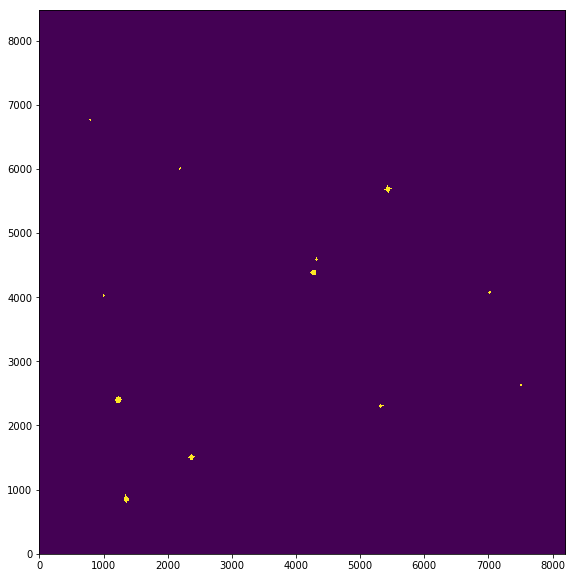

In [131]:
plt.figure(figsize=(10,10))
plt.imshow(starmaskTEST,vmin=0,vmax=1)

In [9]:
#making above a cycle and saving mask

filters = ["F160W","F140W","F125W","F105W","F850LP","F814W","F775W","F625W","F606W"]#,"F435W"]

for filter in filters:
    segmap_output, starmask = create_mask(filter)
    fits.writeto('/data1/rowland/GALSnSTARSmasks/starmask_{}'.format(filter),starmask,overwrite=True)

In [13]:
#actually creates star mask

# TEST PART 1-amended fcn, so this wont work now

# ###################################################
# testtable = SE_TESTshort #t_F105W
# width=100
# xc=testtable['X_IMAGE'][0]
# yc = testtable['Y_IMAGE'][0]
# ##################################################
# collected_regions = []
# index_list = []
# segmapoutputTEST, starmaskTEST = create_mask(testfilter,testtable)
# #F105_final = np.sum(F105_region,axis=0)
# segmapTEST = fits.open('/run/media/rowland/PURPLEDRIVE/segmaps_check/{}_check.fits'.format(testfilter))[0].data
# elgordoTEST = fits.open('/run/media/rowland/PURPLEDRIVE/elgordo_{}.fits'.format(testfilter))[0].data


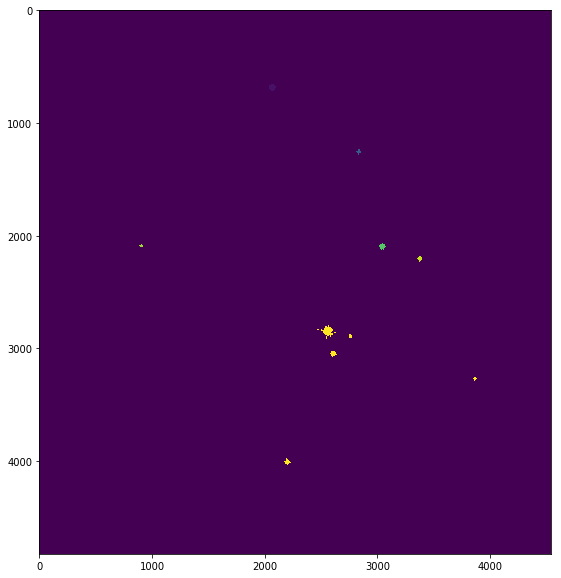

In [18]:
# TEST PART 2 -amended fcn so this wont work now
#plots star mask

# #to test specific stars
# xlow = xc -width
# xhigh = xc +width
# ylow = yc-width
# yhigh = yc+width

# plt.figure(figsize=(10,10))
# plt.imshow(starmaskTEST,vmin=0,vmax=1000)
# plt.xlim(xlow,xhigh)
# plt.ylim(ylow,yhigh)

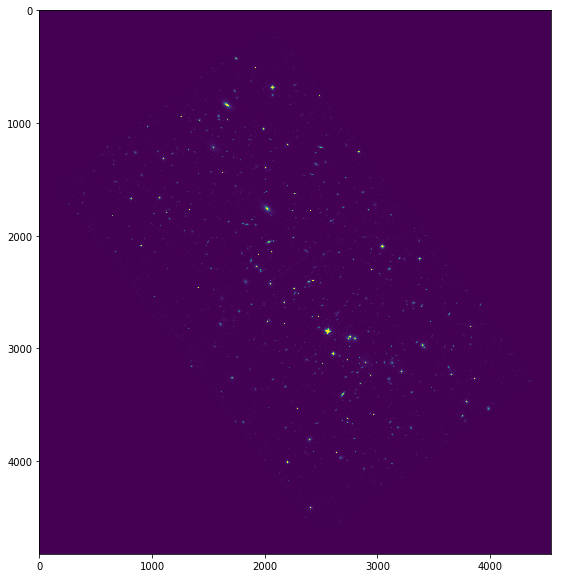

In [15]:
# TEST PART 3
#compare to where can visually see stars on original

plt.figure(figsize=(10,10))
plt.imshow(elgordoTEST,vmin=0,vmax=1)


# tests to add star mask to models

(4824, 4538) (4824, 4538) (4824, 4538) (4824, 4538)


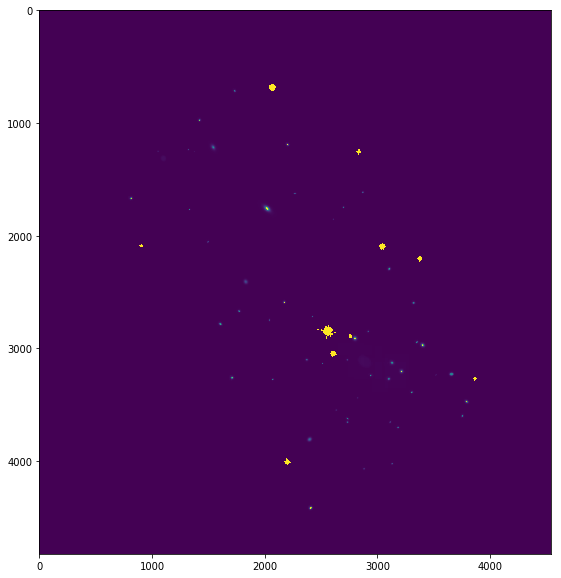

In [16]:
#see if this looks okay first, then create a cycle to make star mask and add it to models for all filters


#open model

#starmaskTEST
modelmaskTEST = fits.getdata('/data1/rowland/models_elgordo{}'.format(testfilter))#.data
modelsandstarsTEST = starmaskTEST + modelmaskTEST
plt.figure(figsize=(10,10))
plt.imshow(modelsandstarsTEST,vmin=0,vmax=1)
print(np.shape(modelmaskTEST),np.shape(starmaskTEST),np.shape(modelsandstarsTEST),np.shape(elgordoTEST))

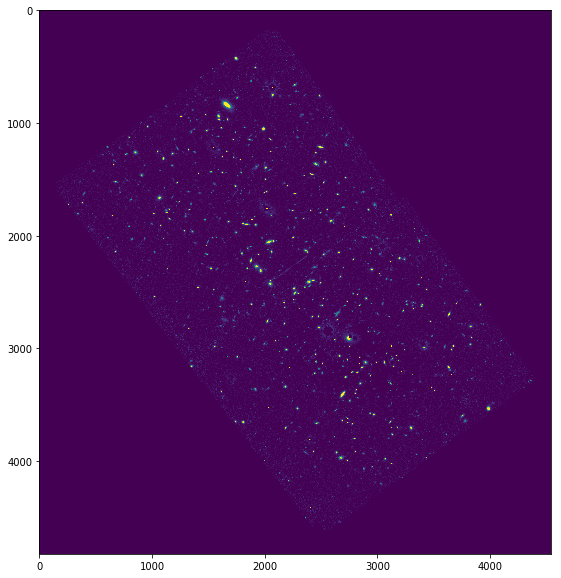

In [20]:
subtractedelgordoTEST = elgordoTEST - modelsandstarsTEST 
plt.figure(figsize=(10,10))
plt.imshow(subtractedelgordoTEST,vmin=0,vmax=0.2)

In [6]:
# plt.figure(figsize=(10,10))
# plt.imshow(segmapTEST,vmin=0,vmax=.7)
# plt.savefig('/data1/rowland/Figures/segmapforpresentation')

still not sure how to zeropoint axes, spines didnt work


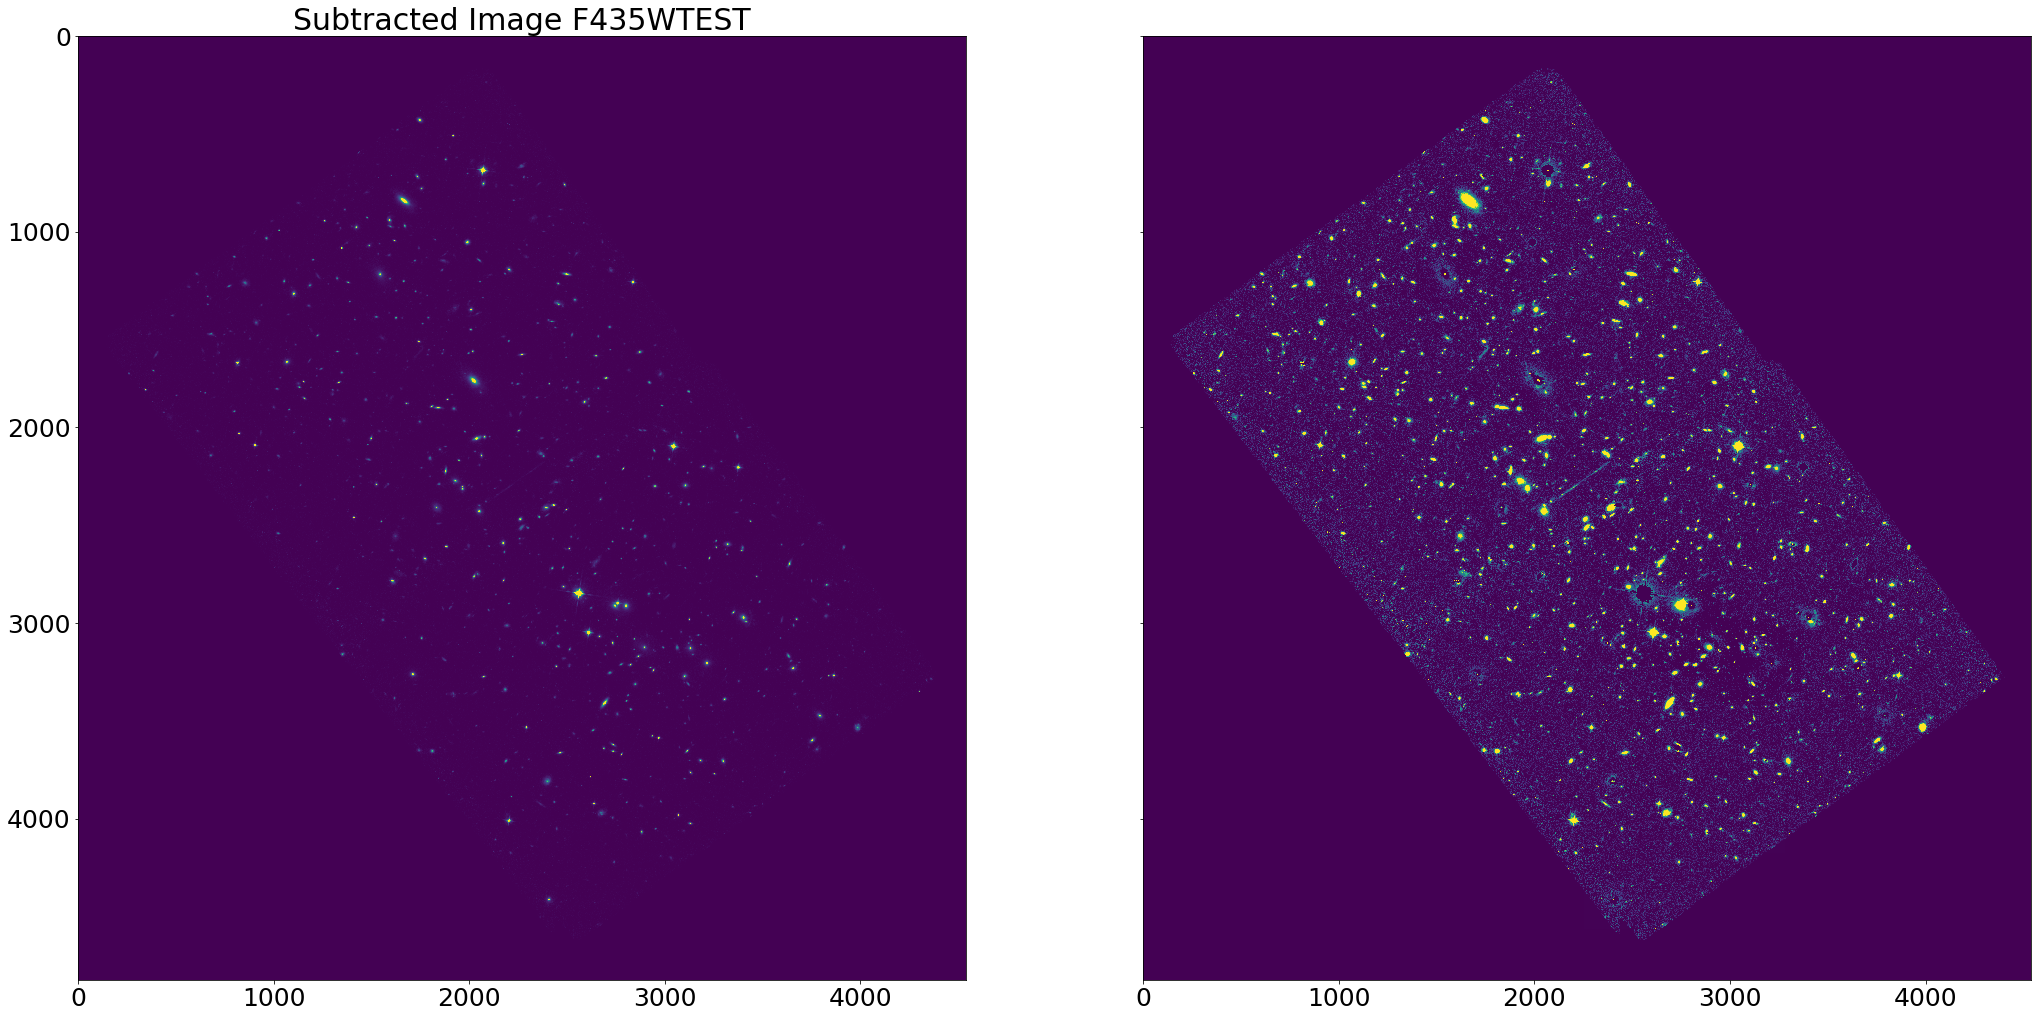

In [58]:
plt.rcParams.update({'font.size': 25})
f, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(35,35))
ax1.imshow(elgordoTEST,vmin=0,vmax=.8) #elgordo
ax1.title.set_text('Original Image {}TEST'.format(filter),)
ax2.imshow(subtractedelgordoTEST,vmin=0,vmax=0.06)#subtracted galaxies & stars
ax1.title.set_text('Subtracted Image {}TEST'.format(filter),)
print('still not sure how to zeropoint axes, spines didnt work')

In [69]:
#want to try & reformat master table to ease reading and index


#masterdata.colnames #first row's data, no colheaders

In [70]:
#renaming all columns
# masterdata['col1_1'].name = 'NUMBER_F105'
# masterdata['col2_1'].name = 'MAG_AUTO_F105'
# masterdata['col3_1'].name = 'MAGERR_AUTO_F105'
# masterdata['col4_1'].name = 'KRON_RADIUS_F105'
# masterdata['col5_1'].name = 'ISOAREA_IMAGE_F105'
# masterdata['col6_1'].name = 'XPEAK_IMAGE_F105'
# masterdata['col7_1'].name = 'YPEAK_IMAGE_F105'
# masterdata['col8_1'].name = 'X_IMAGE_F105'
# masterdata['col9_1'].name = 'Y_IMAGE_F105'
# masterdata['col10_1'].name = 'ALPHA_J2000_F105'
# masterdata['col11_1'].name = 'DELTA_J2000_F105'
# masterdata['col12_1'].name = 'A_IMAGE_F105'
# masterdata['col13_1'].name = 'THETA_IMAGE_F105'
# masterdata['col14_1'].name = 'MU_MAX_F105'
# masterdata['col15_1'].name = 'ELLIPTICITY_F105'
# masterdata['col16_1'].name = 'CLASS_STAR_F105'
# masterdata['col17_1'].name = 'FLUX_RADIUS_F105'

# masterdata['col1_2'].name = 'NUMBER_F125'
# masterdata['col2_2'].name = 'MAG_AUTO_F125'
# masterdata['col3_2'].name = 'MAGERR_AUTO_F125'
# masterdata['col4_2'].name = 'KRON_RADIUS_F125'
# masterdata['col5_2'].name = 'ISOAREA_IMAGE_F125'
# masterdata['col6_2'].name = 'XPEAK_IMAGE_F125'
# masterdata['col7_2'].name = 'YPEAK_IMAGE_F125'
# masterdata['col8_2'].name = 'X_IMAGE_F125'
# masterdata['col9_2'].name = 'Y_IMAGE_F125'
# masterdata['col10_2'].name = 'ALPHA_J2000_F125'
# masterdata['col11_2'].name = 'DELTA_J2000_F125'
# masterdata['col12_2'].name = 'A_IMAGE_F125'
# masterdata['col13_2'].name = 'THETA_IMAGE_F125'
# masterdata['col14_2'].name = 'MU_MAX_F125'
# masterdata['col15_2'].name = 'ELLIPTICITY_F125'
# masterdata['col16_2'].name = 'CLASS_STAR_F125'
# masterdata['col17_2'].name = 'FLUX_RADIUS_F125'



# masterdata.colnames


    ###########################
#     fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8, ax9) = plt.subplots(nrows=1,ncols=10,figsize=(100,100))
#     ax0.imshow(myfiles[0][0].data,vmin=-0.05,vmax=0.5)
#     ax0.set_xlim(xl_list[0],xu_list[0])
#     ax0.set_ylim(yl_list[0],yu_list[0])
#     ax0.set_title(myfiles[0].filename()[15::])
#     ax1.imshow(myfiles[1][0].data,vmin=0,vmax=1)
#     ax1.set_xlim(xl_list[1],xu_list[1])
#     ax1.set_ylim(yl_list[1],yu_list[1])
#     ax1.set_title(myfiles[1].filename()[15::])
#     ax2.imshow(myfiles[2][0].data,vmin=0,vmax=1)
#     ax2.set_xlim(xl_list[2],xu_list[2])
#     ax2.set_ylim(yl_list[2],yu_list[2])
#     ax2.set_title(myfiles[2].filename()[15::])
#     ax3.imshow(myfiles[3][0].data,vmin=0,vmax=1)
#     ax3.set_xlim(xl_list[3],xu_list[3])
#     ax3.set_ylim(yl_list[3],yu_list[3])
#     ax3.set_title(myfiles[3].filename()[15::])
#     ax4.imshow(myfiles[4][0].data,vmin=0,vmax=1)
#     ax4.set_xlim(xl_list[4],xu_list[4])
#     ax4.set_ylim(yl_list[4],yu_list[4])
#     ax4.set_title(myfiles[4].filename()[15::])
#     ax5.imshow(myfiles[5][0].data,vmin=0,vmax=1)
#     ax5.set_xlim(xl_list[5],xu_list[5])
#     ax5.set_ylim(yl_list[5],yu_list[5])
#     ax5.set_title(myfiles[5].filename()[15::])
#     ax6.imshow(myfiles[6][0].data,vmin=0,vmax=1)
#     ax6.set_xlim(xl_list[6],xu_list[6])
#     ax6.set_ylim(yl_list[6],yu_list[6])
#     ax6.set_title(myfiles[6].filename()[15::])
#     ax7.imshow(myfiles[7][0].data,vmin=0,vmax=1)
#     ax7.set_xlim(xl_list[7],xu_list[7])
#     ax7.set_ylim(yl_list[7],yu_list[7])
#     ax7.set_title(myfiles[7].filename()[15::])
#     ax8.imshow(myfiles[8][0].data,vmin=0,vmax=1)    
#     ax8.set_xlim(xl_list[8],xu_list[8])
#     ax8.set_ylim(yl_list[8],yu_list[8])
#     ax8.set_title(myfiles[8].filename()[15::])
#     ax9.imshow(myfiles[9][0].data,vmin=0,vmax=1)
#     ax9.set_xlim(xl_list[9],xu_list[9])
#     ax9.set_ylim(yl_list[9],yu_list[9])
#     ax9.set_title(myfiles[9].filename()[15::])

In [71]:
# masterdata['col1_1a'].name = 'NUMBER_F140'
# masterdata['col2_1a'].name = 'MAG_AUTO_F140'
# masterdata['col3_1a'].name = 'MAGERR_AUTO_F140'
# masterdata['col4_1a'].name = 'KRON_RADIUS_F140'
# masterdata['col5_1a'].name = 'ISOAREA_IMAGE_F140'
# masterdata['col6_1a'].name = 'XPEAK_IMAGE_F140'
# masterdata['col7_1a'].name = 'YPEAK_IMAGE_F140'
# masterdata['col8_1a'].name = 'X_IMAGE_F140'
# masterdata['col9_1a'].name = 'Y_IMAGE_F140'
# masterdata['col10_1a'].name = 'ALPHA_J2000_F140'
# masterdata['col11_1a'].name = 'DELTA_J2000_F140'
# masterdata['col12_1a'].name = 'A_IMAGE_F140'
# masterdata['col13_1a'].name = 'THETA_IMAGE_F140'
# masterdata['col14_1a'].name = 'MU_MAX_F140'
# masterdata['col15_1a'].name = 'ELLIPTICITY_F140'
# masterdata['col16_1a'].name = 'CLASS_STAR_F140'
# masterdata['col17_1a'].name = 'FLUX_RADIUS_F140'

# masterdata['col1_2a'].name = 'NUMBER_F160'
# masterdata['col2_2a'].name = 'MAG_AUTO_F160'
# masterdata['col3_2a'].name = 'MAGERR_AUTO_F160'
# masterdata['col4_2a'].name = 'KRON_RADIUS_F160'
# masterdata['col5_2a'].name = 'ISOAREA_IMAGE_F160'
# masterdata['col6_2a'].name = 'XPEAK_IMAGE_F160'
# masterdata['col7_2a'].name = 'YPEAK_IMAGE_F160'
# masterdata['col8_2a'].name = 'X_IMAGE_F160'
# masterdata['col9_2a'].name = 'Y_IMAGE_F160'
# masterdata['col10_2a'].name = 'ALPHA_J2000_F160'
# masterdata['col11_2a'].name = 'DELTA_J2000_F160'
# masterdata['col12_2a'].name = 'A_IMAGE_F160'
# masterdata['col13_2a'].name = 'THETA_IMAGE_F160'
# masterdata['col14_2a'].name = 'MU_MAX_F160'
# masterdata['col15_2a'].name = 'ELLIPTICITY_F160'
# masterdata['col16_2a'].name = 'CLASS_STAR_F160'
# masterdata['col17_2a'].name = 'FLUX_RADIUS_F160'

# masterdata.colnames


In [72]:
# masterdata['col1_1b'].name = 'NUMBER_F435'
# masterdata['col2_1b'].name = 'MAG_AUTO_F435'
# masterdata['col3_1b'].name = 'MAGERR_AUTO_F435'
# masterdata['col4_1b'].name = 'KRON_RADIUS_F435'
# masterdata['col5_1b'].name = 'ISOAREA_IMAGE_F435'
# masterdata['col6_1b'].name = 'XPEAK_IMAGE_F435'
# masterdata['col7_1b'].name = 'YPEAK_IMAGE_F435'
# masterdata['col8_1b'].name = 'X_IMAGE_F435'
# masterdata['col9_1b'].name = 'Y_IMAGE_F435'
# masterdata['col10_1b'].name = 'ALPHA_J2000_F435'
# masterdata['col11_1b'].name = 'DELTA_J2000_F435'
# masterdata['col12_1b'].name = 'A_IMAGE_F435'
# masterdata['col13_1b'].name = 'THETA_IMAGE_F435'
# masterdata['col14_1b'].name = 'MU_MAX_F435'
# masterdata['col15_1b'].name = 'ELLIPTICITY_F435'
# masterdata['col16_1b'].name = 'CLASS_STAR_F435'
# masterdata['col17_1b'].name = 'FLUX_RADIUS_F435'

# masterdata['col1_2b'].name = 'NUMBER_F606'
# masterdata['col2_2b'].name = 'MAG_AUTO_F606'
# masterdata['col3_2b'].name = 'MAGERR_AUTO_F606'
# masterdata['col4_2b'].name = 'KRON_RADIUS_F606'
# masterdata['col5_2b'].name = 'ISOAREA_IMAGE_F606'
# masterdata['col6_2b'].name = 'XPEAK_IMAGE_F606'
# masterdata['col7_2b'].name = 'YPEAK_IMAGE_F606'
# masterdata['col8_2b'].name = 'X_IMAGE_F606'
# masterdata['col9_2b'].name = 'Y_IMAGE_F606'
# masterdata['col10_2b'].name = 'ALPHA_J2000_F606'
# masterdata['col11_2b'].name = 'DELTA_J2000_F606'
# masterdata['col12_2b'].name = 'A_IMAGE_F606'
# masterdata['col13_2b'].name = 'THETA_IMAGE_F606'
# masterdata['col14_2b'].name = 'MU_MAX_F606'
# masterdata['col15_2b'].name = 'ELLIPTICITY_F606'
# masterdata['col16_2b'].name = 'CLASS_STAR_F606'
# masterdata['col17_2b'].name = 'FLUX_RADIUS_F606'

# masterdata.colnames


In [73]:
# masterdata['col1_1c'].name = 'NUMBER_F625'
# masterdata['col2_1c'].name = 'MAG_AUTO_F625'
# masterdata['col3_1c'].name = 'MAGERR_AUTO_F625'
# masterdata['col4_1c'].name = 'KRON_RADIUS_F625'
# masterdata['col5_1c'].name = 'ISOAREA_IMAGE_F625'
# masterdata['col6_1c'].name = 'XPEAK_IMAGE_F625'
# masterdata['col7_1c'].name = 'YPEAK_IMAGE_F625'
# masterdata['col8_1c'].name = 'X_IMAGE_F625'
# masterdata['col9_1c'].name = 'Y_IMAGE_F625'
# masterdata['col10_1c'].name = 'ALPHA_J2000_F625'
# masterdata['col11_1c'].name = 'DELTA_J2000_F625'
# masterdata['col12_1c'].name = 'A_IMAGE_F625'
# masterdata['col13_1c'].name = 'THETA_IMAGE_F625'
# masterdata['col14_1c'].name = 'MU_MAX_F625'
# masterdata['col15_1c'].name = 'ELLIPTICITY_F625'
# masterdata['col16_1c'].name = 'CLASS_STAR_F625'
# masterdata['col17_1c'].name = 'FLUX_RADIUS_F625'

# masterdata['col1_2c'].name = 'NUMBER_F775'
# masterdata['col2_2c'].name = 'MAG_AUTO_F775'
# masterdata['col3_2c'].name = 'MAGERR_AUTO_F775'
# masterdata['col4_2c'].name = 'KRON_RADIUS_F775'
# masterdata['col5_2c'].name = 'ISOAREA_IMAGE_F775'
# masterdata['col6_2c'].name = 'XPEAK_IMAGE_F775'
# masterdata['col7_2c'].name = 'YPEAK_IMAGE_F775'
# masterdata['col8_2c'].name = 'X_IMAGE_F775'
# masterdata['col9_2c'].name = 'Y_IMAGE_F775'
# masterdata['col10_2c'].name = 'ALPHA_J2000_F775'
# masterdata['col11_2c'].name = 'DELTA_J2000_F775'
# masterdata['col12_2c'].name = 'A_IMAGE_F775'
# masterdata['col13_2c'].name = 'THETA_IMAGE_F775'
# masterdata['col14_2c'].name = 'MU_MAX_F775'
# masterdata['col15_2c'].name = 'ELLIPTICITY_F775'
# masterdata['col16_2c'].name = 'CLASS_STAR_F775'
# masterdata['col17_2c'].name = 'FLUX_RADIUS_F775'

# masterdata.colnames


In [74]:
# masterdata['col1_1d'].name = 'NUMBER_F814'
# masterdata['col2_1d'].name = 'MAG_AUTO_F814'
# masterdata['col3_1d'].name = 'MAGERR_AUTO_F814'
# masterdata['col4_1d'].name = 'KRON_RADIUS_F814'
# masterdata['col5_1d'].name = 'ISOAREA_IMAGE_F814'
# masterdata['col6_1d'].name = 'XPEAK_IMAGE_F814'
# masterdata['col7_1d'].name = 'YPEAK_IMAGE_F814'
# masterdata['col8_1d'].name = 'X_IMAGE_F814'
# masterdata['col9_1d'].name = 'Y_IMAGE_F814'
# masterdata['col10_1d'].name = 'ALPHA_J2000_F814'
# masterdata['col11_1d'].name = 'DELTA_J2000_F814'
# masterdata['col12_1d'].name = 'A_IMAGE_F814'
# masterdata['col13_1d'].name = 'THETA_IMAGE_F814'
# masterdata['col14_1d'].name = 'MU_MAX_F814'
# masterdata['col15_1d'].name = 'ELLIPTICITY_F814'
# masterdata['col16_1d'].name = 'CLASS_STAR_F814'
# masterdata['col17_1d'].name = 'FLUX_RADIUS_F814'

# masterdata['col1_2d'].name = 'NUMBER_F850'
# masterdata['col2_2d'].name = 'MAG_AUTO_F850'
# masterdata['col3_2d'].name = 'MAGERR_AUTO_F850'
# masterdata['col4_2d'].name = 'KRON_RADIUS_F850'
# masterdata['col5_2d'].name = 'ISOAREA_IMAGE_F850'
# masterdata['col6_2d'].name = 'XPEAK_IMAGE_F850'
# masterdata['col7_2d'].name = 'YPEAK_IMAGE_F850'
# masterdata['col8_2d'].name = 'X_IMAGE_F850'
# masterdata['col9_2d'].name = 'Y_IMAGE_F850'
# masterdata['col10_2d'].name = 'ALPHA_J2000_F850'
# masterdata['col11_2d'].name = 'DELTA_J2000_F850'
# masterdata['col12_2d'].name = 'A_IMAGE_F850'
# masterdata['col13_2d'].name = 'THETA_IMAGE_F850'
# masterdata['col14_2d'].name = 'MU_MAX_F850'
# masterdata['col15_2d'].name = 'ELLIPTICITY_F850'
# masterdata['col16_2d'].name = 'CLASS_STAR_F850'
# masterdata['col17_2d'].name = 'FLUX_RADIUS_F850'

# masterdata.colnames


In [75]:
# len(masterdata.colnames) #191
# masterdata #961


In [76]:
# for value in masterdata['ACT-CL']:
#     print(value) #good test
# for value in masterdata.columns:
#     print(value,'NEXT') #bad test of old table

In [77]:
# mastertable = masterdata[(masterdata['ACT-CL']=='J0102-4915')]
# mastertable #89 so only ones in hst pointing area

In [78]:
#ascii.write(mastertable, '/data1/rowland/mastertable')

In [79]:
# x, y = masterdata['XPEAK_IMAGE_1c'][75],masterdata['YPEAK_IMAGE_1c'][75]
# ra,dec = masterdata['ALPHA_J2000_1c'][75],masterdata['DELTA_J2000_1c'][75]
# ra, dec, x, y

In [80]:
#len(masterdata[0])

In [81]:
#masterdata[124:141]#[::] #this is weird

In [82]:
# for i in masterdata['NUMBER_1c']:
#     print(i)

In [83]:
# #% matplotlib notebook
# % matplotlib inline

# fig = plt.figure(figsize=(10,10))
# filename = get_pkg_data_filename('/data1/rowland/elgordo_F625W.fits')

# hdu = fits.open(filename)[0]

# wcs = WCS(hdu.header)
# ax = plt.subplot(projection=wcs)


# plt.imshow(hdu.data, vmin=0, vmax=1)#, origin='lower')
# overlay = ax.get_coords_overlay('fk5')
# overlay.grid(color='white', ls='dotted')
# overlay[0].set_axislabel('Right Ascension (J2000)')
# overlay[1].set_axislabel('Declination (J2000)')
# plt.scatter(masterdata['RAJ2000'], masterdata['DEJ2000'], edgecolor='r', facecolor='none' ,transform=ax.get_transform('fk5'),label='z_matches')
# plt.scatter(masterdata['ALPHA_J2000_1c'], masterdata['DELTA_J2000_1c'], marker='s', edgecolor='green', facecolor='none',transform=ax.get_transform('fk5'),label='F435W_matches')

# # ramin, ramax = np.nanmin(masterdata['ALPHA_J2000_1b'],np.nanmax(masterdata['ALPHA_J2000_1b'])) #in deg
# # decmin, decmax = np.nanmin(masterdata['DELTA_J2000_1b'],np.nanmax(masterdata['DELTA_J2000_1b'])) #in deg
# # position_in_deg = SkyCoord(ra, dec,frame='fk5')
# #ax.set_xlim()
# #to slice need to convert masterdata RA/DECs to elgordo pixels??


# ax.grid(color='white', ls='solid')
# ax.legend()

In [84]:
# mytest = fits.open('/data1/rowland/elgordo_F625W.fits')
# b = mytest[0].data
# a=mytest[0].data[4000:5000,4000:5000]
# b.shape
# mytest[0].header

In [85]:
# a = SkyCoord(15.7,-49.16, unit=u.deg)
# print(type(a))

# ax.get_transform('fk5')


# for row in mytest[0].data:
#     for i in row:
#         if i != 0.0:
#             print(i)
#plt.imshow(a,vmin=0,vmax=1)

In [86]:
#this wont work b/c input will always be RA/DEC from testPSF_filter.cat table of seg catalog

# def elgordo_zoom(x,y): 
#     filters = {'F625W','F775W'}
#     for filter in filters:
#         files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#         print('files:',files)
#         #ra = pywcs.pix2world(x,y)
#         print('im working')
#         for f in files:
#             #print('this is f:',f.data)
#             print('f data shape:',f.data.shape)
#             plt.figure(figsize=(5,5))
#             xl = x-100 #behaves like y axis
#             xu = x +100
#             yl = y -100
#             yu = y +100
#             plt.imshow(f.data[xl:xu,yl:yu],vmin=0,vmax=1)
#             print('got to the bottom')


In [87]:
#elgordo_zoom(8473, 8201)           #(4400,4275) #star
#ra, dec

In [88]:
# mytest2 = np.arange(0,5000,1)
# header = mytest[0].header
# wcs=pywcs.WCS(header)
# xy = np.array(wcs.wcs_world2pix(ra,dec,1))
# np.shape(x)
# #mytest2[4800:x]
# xy.astype(int)
# xy.shape
# x = xy[0]
# x2 = int(round(x))
# #mytest2[4800:x] #cant slice b/c its a float not int
# x2
# mytest2[4800:x2]

In [89]:
# filters = {'F625W','F775W'}
# for filter in filters:
#     files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#     for f in files:
#         header = f.header
#         #print(header)
#         wcs=pywcs.WCS(header)
#         xy = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy.astype(int)
#         x = xy[0]
#         y = xy[1]
#         xint = int(round(x))
#         yint = int(round(y))
        

In [90]:
# def elgordo_zoom(ra,dec):
#     filters = {'F625W','F775W'}
#     for filter in filters:
#         files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#         #for f in files:
#         #first file
#         print(files[0][0].shape)
#         header0 = files[0][0].header
#         data0 = files[0][0].data
#         wcs0=pywcs.WCS(header0)
#         xy0 = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy0.astype(int)
#         x0 = xy0[0]
#         y0 = xy0[1]
#         xint0 = int(round(x0))
#         yint0 = int(round(y0))
#         xlower0 = xint0-100
#         xupper0 = xint0+100
#         ylower0 = yint0-100
#         yupper0 = yint0+100
#         #second file
#         header1 = files[1].header
#         data1 = files[1].data
#         wcs1=pywcs.WCS(header1)
#         xy1 = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy1.astype(int)
#         x1 = xy1[0]
#         y1 = xy1[1]
#         xint1 = int(round(x1))
#         yint1 = int(round(y1))
#         xlower1 = xint1-100
#         xupper1 = xint1+100
#         ylower1 = yint1-100
#         yupper1 = yint1+100
#         f, (ax0,ax1) = mpl.subplots(1,2,sharey=True,figsize=(35,35))
#         ax0.imshow(data0[xlower0:xupper0,ylower0:yupper0],vmin=0,vmax=1)
#         ax1.imshow(data1[xlower1:xupper1,ylower1:yupper1],vmin=0,vmax=1)


In [91]:
# def elgordo_zoom(ra,dec):
#     filters = {'F625W','F775W'}
#     xl_list=[]
#     xu_list=[]
#     yl_list=[]
#     yu_list=[]
#     myfiles = []
#     for filter in filters:
#         print('filter:',filter)
#         files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#         print('FILES:',files)
#         data0 = files[0].data
#         #data1 = files[1].data
#         print('data:', data0.shape)#,data1.shape)
#         myfiles.append(files)
#     print('MYFILES:',myfiles)
#     for f in myfiles:
#         print('F:',f)
#         #print('FILES2:',myfiles)
#         header = f[0].header
#         wcs=pywcs.WCS(header)
#         xy = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy.astype(int)
#         xlower = int(round(xy[0])) -50
#         xupper = int(round(xy[0])) +50
#         ylower = int(round(xy[1])) -50
#         yupper = int(round(xy[1])) +50
#         xl_list.append(xlower)
#         xu_list.append(xupper)
#         yl_list.append(ylower)
#         yu_list.append(yupper)
#     print('lists:',xl_list,xu_list,yl_list,yu_list)
#     fig, (ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(15,35))
#     testd = myfiles[1][0].shape#files[0].info()#[0][]
#     print('FINALFILES:,',files)
#     print('TEST:',testd)
#     ax0.imshow(myfiles[0][0].data[xl_list[0]:xu_list[0],yl_list[0]:yu_list[0]],vmin=0,vmax=1)
#     ax0.set_title('F625W')
#     ax1.imshow(myfiles[1][0].data[xl_list[1]:xu_list[1],yl_list[1]:yu_list[1]],vmin=0,vmax=1)
#     ax1.set_title('F775W')
    
    
    
    
    
    
#     ax0.imshow(myfiles[0][0].data[xl_list[0]:xu_list[0],yl_list[0]:yu_list[0]],vmin=0,vmax=1)
#     ax0.set_title('F625W')
#     ax1.imshow(myfiles[1][0].data[xl_list[1]:xu_list[1],yl_list[1]:yu_list[1]],vmin=0,vmax=1)
#     ax1.set_title('F775W')
    #ax.scatter(myfiles[0][])

In [92]:
#elgordo_zoom(ra,dec)

In [93]:
#this one WORKS EXCEPT forgot to write in exception if get too close to edge





# def elgordo_zoom(ra,dec):
#     filters = {"F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"}
#     xl_list=[]
#     xu_list=[]
#     yl_list=[]
#     yu_list=[]
#     myfiles = []
#     for filter in filters:
#      #   print('filter:',filter)
#         files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#       #  print('FILES:',files)
#         data0 = files[0].data
#         #data1 = files[1].data
#       #  print('data:', data0.shape)#,data1.shape)
#         myfiles.append(files)
#     #print('MYFILES:',myfiles)
#     for f in myfiles:
#      #   print('F:',f)
#         #print('FILES2:',myfiles)
#         header = f[0].header
#         wcs=pywcs.WCS(header)
#         xy = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy.astype(int)
#         xlower = int(round(xy[0])) -50
#         xupper = int(round(xy[0])) +50
#         ylower = int(round(xy[1])) -50
#         yupper = int(round(xy[1])) +50
#         xl_list.append(xlower)
#         xu_list.append(xupper)
#         yl_list.append(ylower)
#         yu_list.append(yupper)
#     #print('lists:',xl_list,xu_list,yl_list,yu_list)
#     fig, (ax0,ax1,ax2,ax3,ax4, ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=10,ncols=1,figsize=(40,40))
#     testd = myfiles[1][0].shape#files[0].info()#[0][]
#     #print('FINALFILES:,',files)
#     #print('TEST:',testd)
#     ax0.imshow(myfiles[0][0].data[xl_list[0]:xu_list[0],yl_list[0]:yu_list[0]],vmin=0,vmax=1)
#     ax0.set_title('F105W')
#     ax1.imshow(myfiles[1][0].data[xl_list[1]:xu_list[1],yl_list[1]:yu_list[1]],vmin=0,vmax=1)
#     ax1.set_title('F125W')
#     ax2.imshow(myfiles[2][0].data[xl_list[2]:xu_list[2],yl_list[2]:yu_list[2]],vmin=0,vmax=1)
#     ax2.set_title('F140W')
#     ax3.imshow(myfiles[3][0].data[xl_list[3]:xu_list[3],yl_list[3]:yu_list[3]],vmin=0,vmax=1)
#     ax3.set_title('F160W')
#     ax4.imshow(myfiles[4][0].data[xl_list[4]:xu_list[4],yl_list[4]:yu_list[4]],vmin=0,vmax=1)
#     ax4.set_title('F435W')
#     ax5.imshow(myfiles[5][0].data[xl_list[5]:xu_list[5],yl_list[5]:yu_list[5]],vmin=0,vmax=1)
#     ax5.set_title('F606W')
#     ax6.imshow(myfiles[6][0].data[xl_list[6]:xu_list[6],yl_list[6]:yu_list[6]],vmin=0,vmax=1)
#     ax6.set_title('F625W')
#     ax7.imshow(myfiles[7][0].data[xl_list[7]:xu_list[7],yl_list[7]:yu_list[7]],vmin=0,vmax=1)
#     ax7.set_title('F775W')
#     ax8.imshow(myfiles[8][0].data[xl_list[8]:xu_list[8],yl_list[8]:yu_list[8]],vmin=0,vmax=1)
#     ax8.set_title('F814W')
#     ax9.imshow(myfiles[9][0].data[xl_list[9]:xu_list[9],yl_list[9]:yu_list[9]],vmin=0,vmax=1)
#     ax9.set_title('F850LP')
    #ax.scatter(myfiles[0][])

In [94]:
#this is the FINAL one that WORKS - but moved to zoom_fcn nb b/c this is for tests 






# def elgordo_zoom(ra,dec):
#     filters = {"F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"}
#     xl_list=[]
#     xu_list=[]
#     yl_list=[]
#     yu_list=[]
#     myfiles = []
#     for filter in filters:
#      #   print('filter:',filter)
#         files = fits.open('/data1/rowland/elgordo_{}.fits'.format(filter))
#       #  print('FILES:',files)
#         data0 = files[0].data
#         #data1 = files[1].data
#       #  print('data:', data0.shape)#,data1.shape)
#         myfiles.append(files)
#     #print('MYFILES:',myfiles)
#     for f in myfiles:
#      #   print('F:',f)
#         #print('FILES2:',myfiles)
#         header = f[0].header
#         wcs=pywcs.WCS(header)
#         xy = np.array(wcs.wcs_world2pix(ra,dec,1))
#         xy.astype(int)
        
        
# #         xtest = int(round(xy[0]))
# #         xtestu = int(round(xy[0]))
# #         ytest = int(round(xy[1]))
# #         ytestu = int(round(xy[1]))
#        # print('test of xy:',xtest,xtestu,ytest,ytestu, 'for file shape:',f[0].data.shape)
        
#         #need exception if gets close to edge
#         if xy[0] < f[0].data.shape[0] and xy[1] < f[0].data.shape[1]:
#             xlower = int(round(xy[0])) -50
#             xupper = int(round(xy[0])) +50
#             ylower = int(round(xy[1])) -50
#             yupper = int(round(xy[1])) +50
#         else: #will print entire data field b/c ra/dec arent in it
#             xlower = 0
#             xupper = f[0].data.shape[0]
#             ylower = 0
#             yupper = f[0].data.shape[1]
#         xl_list.append(xlower)
#         xu_list.append(xupper)
#         yl_list.append(ylower)
#         yu_list.append(yupper)
#     print('lists:',xl_list,xu_list,yl_list,yu_list)
#     fig, (ax0,ax1,ax2,ax3,ax4, ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=10,ncols=1,figsize=(40,40))
#     testd = myfiles[1][0].shape#files[0].info()#[0][]
#     #print('FINALFILES:,',files)
#     #print('TEST:',testd)
#     ax0.imshow(myfiles[0][0].data[xl_list[0]:xu_list[0],yl_list[0]:yu_list[0]],vmin=0,vmax=1)
#     ax0.set_title('F105W')
#     ax1.imshow(myfiles[1][0].data[xl_list[1]:xu_list[1],yl_list[1]:yu_list[1]],vmin=0,vmax=1)
#     ax1.set_title('F125W')
#     ax2.imshow(myfiles[2][0].data[xl_list[2]:xu_list[2],yl_list[2]:yu_list[2]],vmin=0,vmax=1)
#     ax2.set_title('F140W')
#     ax3.imshow(myfiles[3][0].data[xl_list[3]:xu_list[3],yl_list[3]:yu_list[3]],vmin=0,vmax=1)
#     ax3.set_title('F160W')
#     ax4.imshow(myfiles[4][0].data[xl_list[4]:xu_list[4],yl_list[4]:yu_list[4]],vmin=0,vmax=1)
#     ax4.set_title('F435W')
#     ax5.imshow(myfiles[5][0].data[xl_list[5]:xu_list[5],yl_list[5]:yu_list[5]],vmin=0,vmax=1)
#     ax5.set_title('F606W')
#     ax6.imshow(myfiles[6][0].data[xl_list[6]:xu_list[6],yl_list[6]:yu_list[6]],vmin=0,vmax=1)
#     ax6.set_title('F625W')
#     ax7.imshow(myfiles[7][0].data[xl_list[7]:xu_list[7],yl_list[7]:yu_list[7]],vmin=0,vmax=1)
#     ax7.set_title('F775W')
#     ax8.imshow(myfiles[8][0].data[xl_list[8]:xu_list[8],yl_list[8]:yu_list[8]],vmin=0,vmax=1)
#     ax8.set_title('F814W')
#     ax9.imshow(myfiles[9][0].data[xl_list[9]:xu_list[9],yl_list[9]:yu_list[9]],vmin=0,vmax=1)
#     ax9.set_title('F850LP')
    #ax.scatter(myfiles[0][])

In [95]:
#elgordo_zoom(ra,dec)